# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [184]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [185]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [51]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Wall time: 1.35 s
Train ROC-AUC 0.9669
Valid ROC-AUC 0.9121
Test ROC-AUC 0.9044


## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [115]:
from tqdm import tqdm

In [356]:
def find_best_hyperparams(params: dict, label: str, args: list, base_model_params: bool = False):
    acc_train = []
    acc_test =[]
    for arg in tqdm(args):
        if base_model_params:
            params['base_model_params'][label] = arg
        else:
            params[label] = arg
        boosting = Boosting(**params)
        boosting.fit(x_train, y_train, x_valid, y_valid)
        acc_train.append(boosting.score(x_train, y_train))
        acc_test.append(boosting.score(x_test, y_test))
    plt.figure(figsize = (12, 7))
    plt.plot(args, acc_train, label = 'train')
    plt.plot(args, acc_test, label = 'test')
    plt.xlabel(label)
    plt.ylabel('AUC_ROC')
    plt.legend()
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:15<00:00,  1.04s/it]


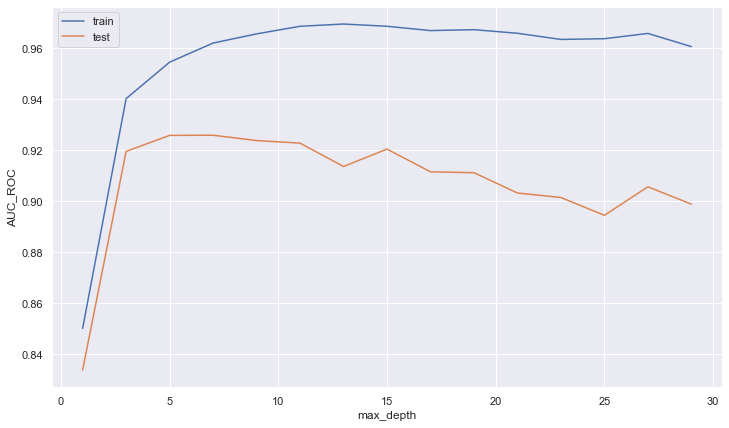

In [357]:
find_best_hyperparams(
    params = {'base_model_params' : {'max_depth' : 10}}, 
    label = 'max_depth',
    args = np.arange(1, 30, 2), 
    base_model_params = True)

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Модель с max_depths = 7 имеет лучшее качество, так как композиция все еще не успела переобучиться от сложности базового алгоритма (можно заметить что качество на обучающей выборке выходит на плато при бОльших max_depths), но при этом алгоритмы достаточно сложные, чтобы иметь высокую обобщающую способность

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

Так как гиперпараметров очень много, перебирать я их буду последовательно

In [123]:
def find_best_hyperparams(params: dict, label: str, args: list, base_model_params: bool = False):
    acc_train = []
    acc_valid =[]
    for arg in tqdm(args):
        if base_model_params:
            params['base_model_params'][label] = arg
        else:
            params[label] = arg
        boosting = Boosting(**params)
        boosting.fit(x_train, y_train, x_valid, y_valid)
        acc_train.append(boosting.score(x_train, y_train))
        acc_valid.append(boosting.score(x_valid, y_valid))
    plt.figure(figsize = (12, 7))
    plt.plot(args, acc_train, label = 'train')
    plt.plot(args, acc_valid, label = 'val')
    plt.xlabel(label)
    plt.ylabel('AUC_ROC')
    plt.legend()
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:09<00:00,  1.42it/s]


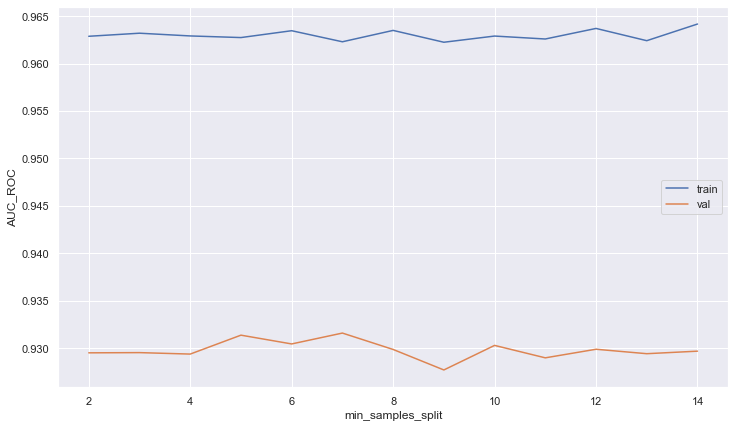

In [124]:
find_best_hyperparams(
    params = {'base_model_params' : {'max_depth' : 7, 'min_samples_split' : 2}}, 
    label = 'min_samples_split',
    args = np.arange(2, 15, 1), 
    base_model_params = True)

Лучший min_samples_split = 5

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.40it/s]


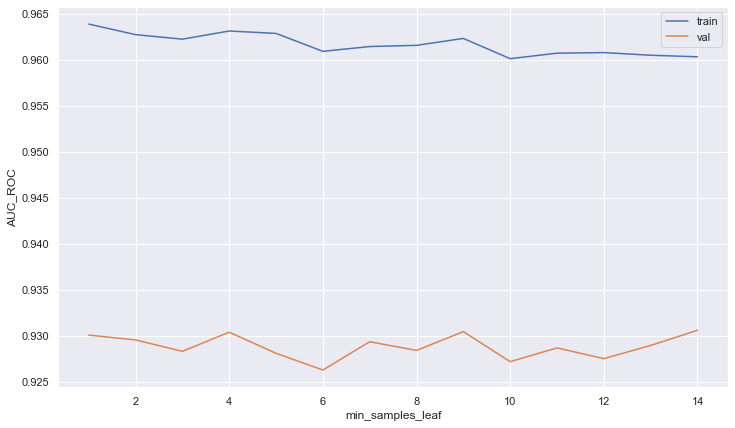

In [125]:
find_best_hyperparams(
    params = {'base_model_params' : {'max_depth' : 7, 'min_samples_split' : 5, 'min_samples_leaf' : 1}}, 
    label = 'min_samples_leaf',
    args = np.arange(1, 15, 1), 
    base_model_params = True)

Лучший min_samples_leaf = 4

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.43it/s]


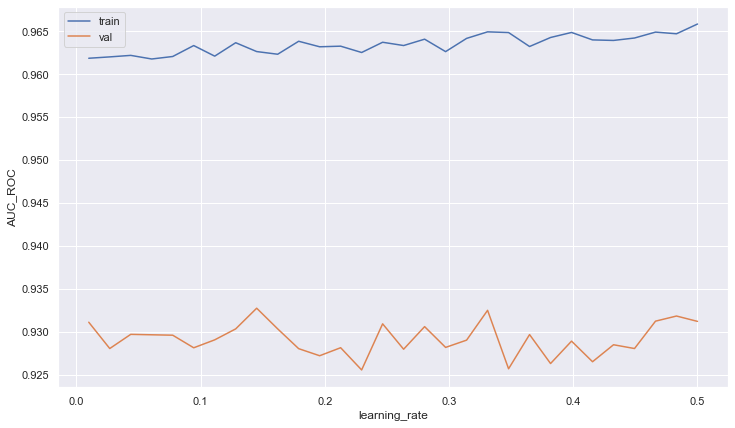

In [126]:
find_best_hyperparams(
    params = {'base_model_params' : 
              {'max_depth' : 7, 'min_samples_split' : 5, 'min_samples_leaf' : 4}, 
              'learning_rate' : 0.1}, 
    label = 'learning_rate',
    args = np.linspace(0.01, 0.5, 30), 
    base_model_params = False)

Возьмем lr = 0.15

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:43<00:00,  5.43s/it]


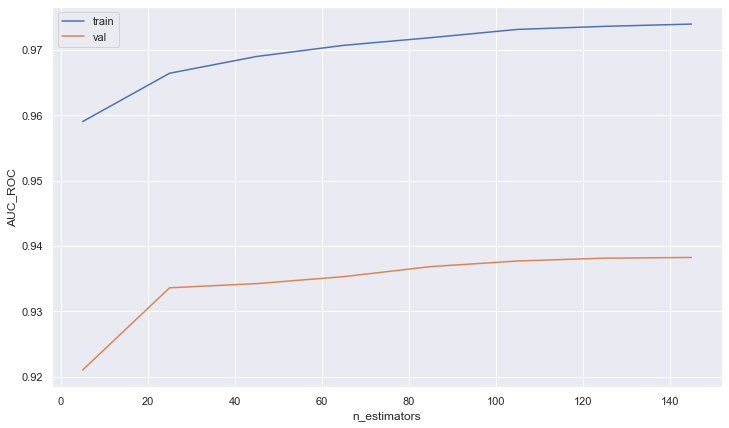

In [130]:
find_best_hyperparams(
    params = {'base_model_params' : 
              {'max_depth' : 7, 'min_samples_split' : 5, 'min_samples_leaf' : 4}, 
              'learning_rate' : 0.15, 'n_estimators' : 10}, 
    label = 'n_estimators',
    args = np.arange(5, 150, 20), 
    base_model_params = False)

Самый мощный гиперпараметр, берем 125

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:45<00:00, 10.59s/it]


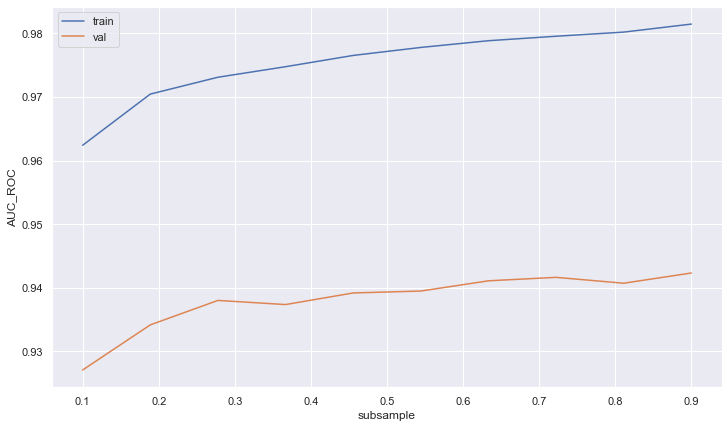

In [131]:
find_best_hyperparams(
    params = {'base_model_params' : 
              {'max_depth' : 7, 'min_samples_split' : 5, 'min_samples_leaf' : 4}, 
              'learning_rate' : 0.15, 'n_estimators' : 125, 'subsample' : 0.3}, 
    label = 'subsample',
    args = np.linspace(0.1, 0.9, 10), 
    base_model_params = False)

subsample возьмем равным 0.7

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:46<00:00, 11.54s/it]


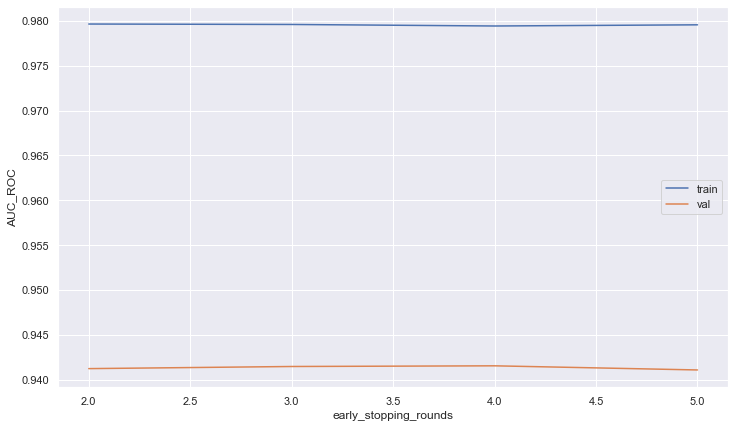

In [132]:
find_best_hyperparams(
    params = {'base_model_params' : 
              {'max_depth' : 7, 'min_samples_split' : 5, 'min_samples_leaf' : 4}, 
              'learning_rate' : 0.15, 'n_estimators' : 125, 'subsample' : 0.7, 'early_stopping_rounds' : 2}, 
    label = 'early_stopping_rounds',
    args = np.arange(2, 6, 1), 
    base_model_params = False)

early_stopping_rounds возьмем равным 2

In [133]:
boosting = Boosting(base_model_params = {'max_depth' : 7, 'min_samples_split' : 5, 'min_samples_leaf' : 4}, 
              learning_rate = 0.15, n_estimators = 125, subsample = 0.7, early_stopping_rounds = 2)
boosting.fit(x_train, y_train, x_valid, y_valid)
print('Train AUC_ROC: ', boosting.score(x_train, y_train))
print('Test AUC_ROC: ', boosting.score(x_test, y_test))

Train AUC_ROC:  0.9796858227397778
Test AUC_ROC:  0.9388425549066874


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [191]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [219]:
def find_best_hyperparams_xgboost(params: dict, label: str, args: list, args_str = False):
    acc_train = []
    acc_valid =[]
    for arg in tqdm(args):
        params[label] = arg
        boosting = xgb.XGBClassifier(**params)
        boosting.fit(x_train, y_train, eval_metric='auc')
        acc_train.append(roc_auc_score(y_train, boosting.predict_proba(x_train)[:, 1]))
        acc_valid.append(roc_auc_score(y_valid, boosting.predict_proba(x_valid)[:, 1]))
    plt.figure(figsize = (12, 7))
    if args_str:
        plt.plot(np.arange(len(args)), acc_train, label = 'train')
        plt.plot(np.arange(len(args)), acc_valid, label = 'test')
        plt.xticks(np.arange(len(args)), args)
    else:
        plt.plot(args, acc_train, label = 'train')
        plt.plot(args, acc_valid, label = 'test')
    plt.xlabel(label)
    plt.ylabel('AUC_ROC')
    plt.legend()
    plt.show()

Здесь я стартую с рекомендованных параметров, которые нарыл в интернете

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]


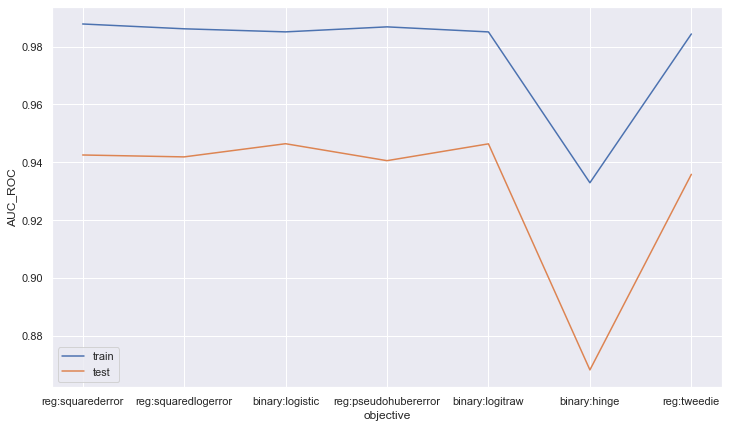

In [226]:
params = {'learning_rate' : 0.1, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 1, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'objective', args = ['reg:squarederror', 'reg:squaredlogerror',
                                                                            'binary:logistic',
                                                                            'reg:pseudohubererror',
                                                                            'binary:logitraw', 'binary:hinge',
                                                                            'reg:tweedie'],
                             args_str = True)

Бинарный logreg показывает лучший результат, возьмем его

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.12it/s]


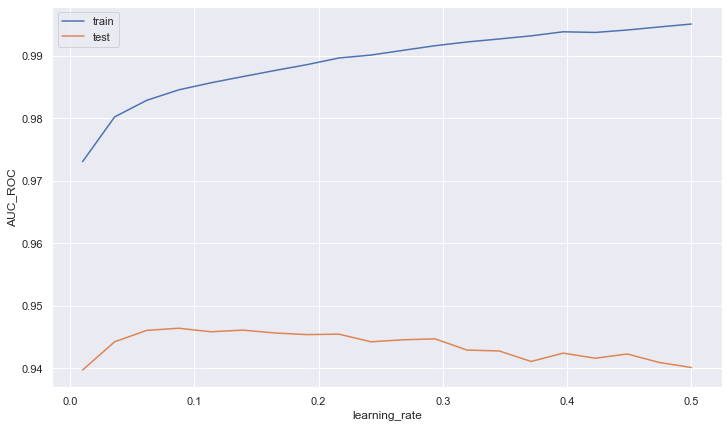

In [225]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 1, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'learning_rate', args = np.linspace(0.01, 0.5, 20))

Зафиксируем lr = 0.05

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:23<00:00,  1.59s/it]


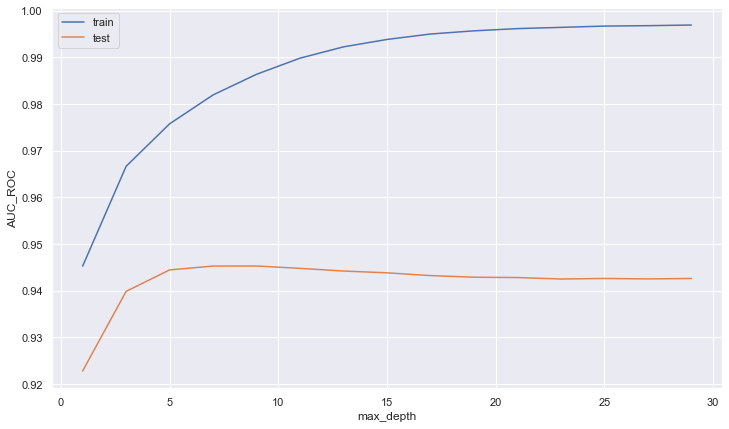

In [227]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 1, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'max_depth', args = np.arange(1, 30, 2))

Остановимся на рекомендованных 6-7

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.32it/s]


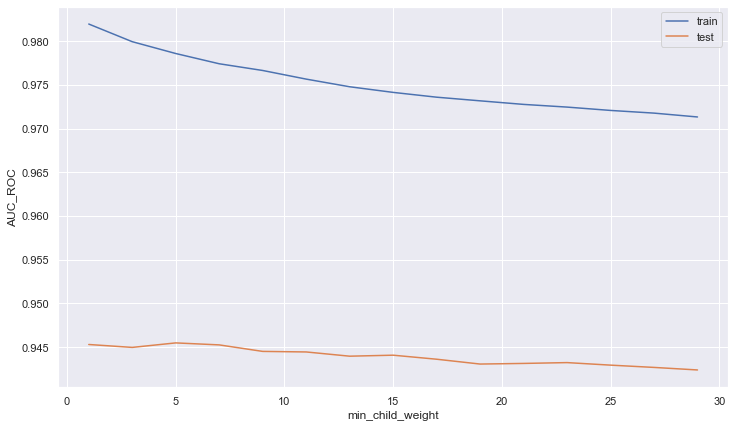

In [229]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 1, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'min_child_weight', args = np.arange(1, 30, 2))

Возьмем 5

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:40<00:00,  1.25it/s]


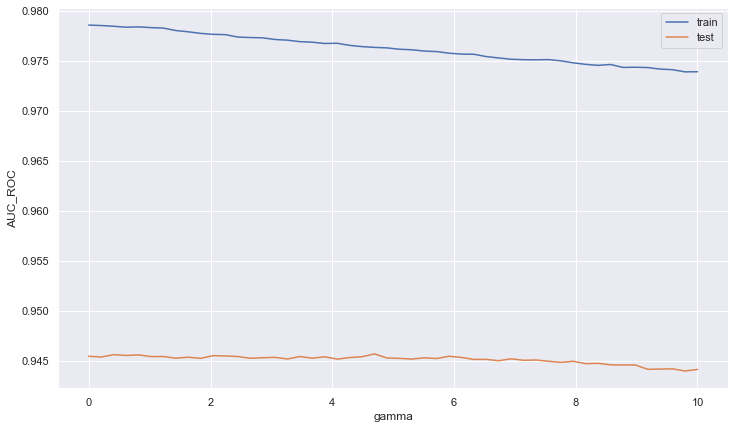

In [231]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 5, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'gamma', args = np.linspace(0, 10, 50))

В целом, на маленьких gamma особо ничего и не меняется. Оставим 0

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.33it/s]


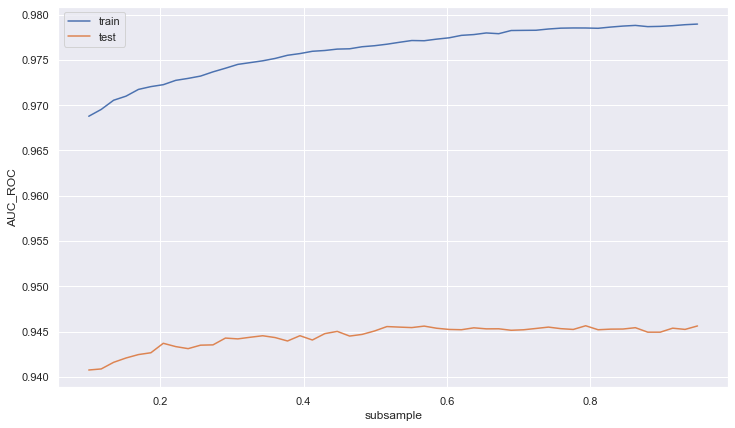

In [233]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 5, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'subsample', args = np.linspace(0.1, 0.95, 50))

Базовых 0.8 достаточно

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.33it/s]


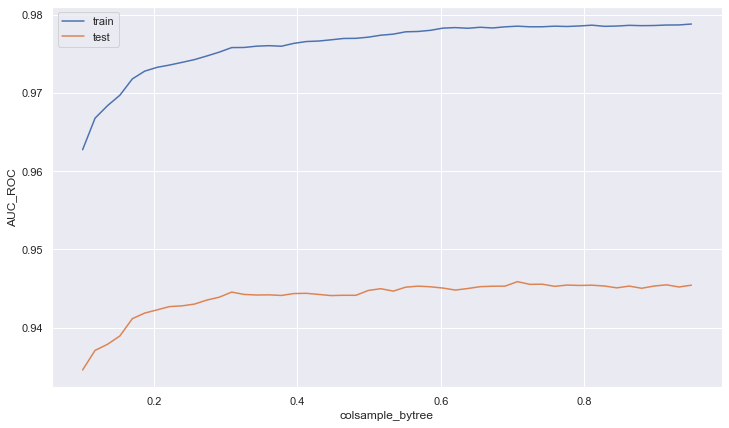

In [234]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 5, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'colsample_bytree', args = np.linspace(0.1, 0.95, 50))

Берем 0.7

Так как базово xgboost работает сильно быстрей моей имплементации, попробуем взять n на порядок больше

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.88s/it]


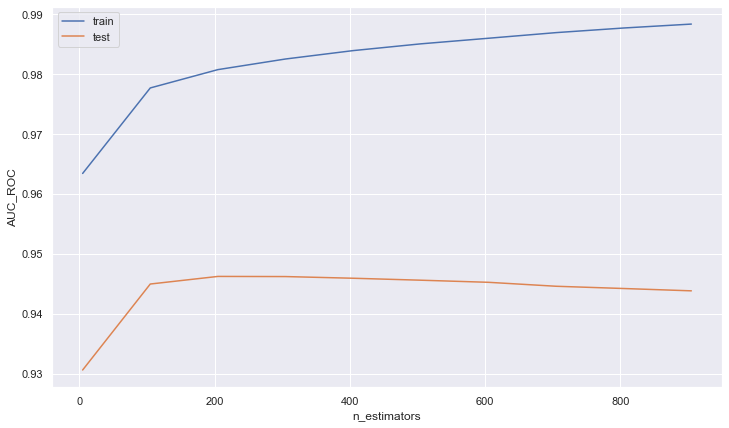

In [236]:
params = {'learning_rate' : 0.05, 'n_estimators' : 125, 'max_depth' : 7, 'min_child_weight' : 5, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}
find_best_hyperparams_xgboost(params = params, label = 'n_estimators', args = np.arange(5, 1000, 100))

Берем 200 и смотрим результат

In [313]:
params = {'learning_rate' : 0.05, 'n_estimators' : 200, 'max_depth' : 7, 'min_child_weight' : 5, 
          'gamma' : 0, 'subsample' : 0.8, 'colsample_bytree' : 0.8, 'objective' : 'binary:logistic', 'seed' : 51261}

In [314]:
boosting = xgb.XGBClassifier(**params)
boosting.fit(x_train, y_train, eval_metric='auc')
print('AUC_ROC train: ', roc_auc_score(y_train, boosting.predict_proba(x_train)[:, 1]))
print('AUC_ROC test: ', roc_auc_score(y_test, boosting.predict_proba(x_test)[:, 1]))

AUC_ROC train:  0.9806626799411581
AUC_ROC test:  0.9407496658127639


Вышло лучше и быстрее, чем моя имплементация

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

В качестве интервалов параметров будем использовать значения, основанные на полученных выше результатах (то есть уменьшим их ширину)

In [260]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.4, log=True)
    gamma = trial.suggest_float('gamma', 1e-3, 1e1, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 0.9, log=True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 1e-1, 1, log=True)
    
    params = {'learning_rate' : learning_rate, 'n_estimators' : n_estimators, 'max_depth' : max_depth, 
              'min_child_weight' : min_child_weight, 'gamma' : gamma, 'subsample' : subsample, 
              'colsample_bytree' : colsample_bytree, 'objective' : 'binary:logistic', 'seed' : 51261}
    
    boosting = xgb.XGBClassifier(**params)
    boosting.fit(x_train, y_train, eval_metric='auc')
    accuracy = roc_auc_score(y_valid, boosting.predict_proba(x_valid)[:, 1])
    
    return accuracy

In [261]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2021-12-19 12:01:10,321] A new study created in memory with name: no-name-4580284c-06c4-412d-8292-9809eac5b65d
[I 2021-12-19 12:01:13,215] Trial 0 finished with value: 0.9450513356528762 and parameters: {'n_estimators': 698, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.09727343738676064, 'gamma': 0.061742798396762284, 'subsample': 0.5418119330127785, 'colsample_bytree': 0.29593974631348696}. Best is trial 0 with value: 0.9450513356528762.
[I 2021-12-19 12:01:15,278] Trial 1 finished with value: 0.9450641067085557 and parameters: {'n_estimators': 345, 'max_depth': 7, 'min_child_weight': 1, 'learning_rate': 0.2512903597955889, 'gamma': 7.612415820745174, 'subsample': 0.5413355056201694, 'colsample_bytree': 0.931742763504771}. Best is trial 1 with value: 0.9450641067085557.
[I 2021-12-19 12:01:16,834] Trial 2 finished with value: 0.9463910992127442 and parameters: {'n_estimators': 435, 'max_depth': 3, 'min_child_weight': 4, 'learning_rate': 0.053383701487418896, 'gamma': 0

[I 2021-12-19 12:01:56,712] Trial 23 finished with value: 0.9447089117224723 and parameters: {'n_estimators': 165, 'max_depth': 8, 'min_child_weight': 2, 'learning_rate': 0.14828930426108114, 'gamma': 0.097531777330007, 'subsample': 0.8193742350821331, 'colsample_bytree': 0.5856428072347318}. Best is trial 20 with value: 0.946589848766755.
[I 2021-12-19 12:01:57,221] Trial 24 finished with value: 0.9459712507572837 and parameters: {'n_estimators': 102, 'max_depth': 6, 'min_child_weight': 5, 'learning_rate': 0.08425591358846721, 'gamma': 0.8279808009569335, 'subsample': 0.7706336249891336, 'colsample_bytree': 0.4333807483996055}. Best is trial 20 with value: 0.946589848766755.
[I 2021-12-19 12:01:58,868] Trial 25 finished with value: 0.9443760660838277 and parameters: {'n_estimators': 263, 'max_depth': 8, 'min_child_weight': 3, 'learning_rate': 0.13207384484000798, 'gamma': 0.28531136463300805, 'subsample': 0.8427955441142713, 'colsample_bytree': 0.6582682474667825}. Best is trial 20 wi

[I 2021-12-19 12:02:33,655] Trial 46 finished with value: 0.9467826118884161 and parameters: {'n_estimators': 520, 'max_depth': 4, 'min_child_weight': 2, 'learning_rate': 0.05737410379849821, 'gamma': 0.0033186547747054694, 'subsample': 0.6240880048501701, 'colsample_bytree': 0.31760319654996544}. Best is trial 39 with value: 0.9472878667787327.
[I 2021-12-19 12:02:35,600] Trial 47 finished with value: 0.9468911658616911 and parameters: {'n_estimators': 613, 'max_depth': 3, 'min_child_weight': 2, 'learning_rate': 0.05441721635103489, 'gamma': 0.0016999725105458906, 'subsample': 0.6857097764346904, 'colsample_bytree': 0.24584804774297492}. Best is trial 39 with value: 0.9472878667787327.
[I 2021-12-19 12:02:38,589] Trial 48 finished with value: 0.9468775966150317 and parameters: {'n_estimators': 811, 'max_depth': 4, 'min_child_weight': 2, 'learning_rate': 0.06292738598341135, 'gamma': 0.00905946349255221, 'subsample': 0.6551312899870114, 'colsample_bytree': 0.3536683699271726}. Best is 

[I 2021-12-19 12:03:29,402] Trial 69 finished with value: 0.9474590787439349 and parameters: {'n_estimators': 660, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.11561179212925288, 'gamma': 0.006664028697776132, 'subsample': 0.6297719185503732, 'colsample_bytree': 0.14512162287174069}. Best is trial 58 with value: 0.9475620453803499.
[I 2021-12-19 12:03:31,501] Trial 70 finished with value: 0.9471250358188201 and parameters: {'n_estimators': 665, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.09251276450515569, 'gamma': 0.006154286174382345, 'subsample': 0.5954412665816551, 'colsample_bytree': 0.14653959801341845}. Best is trial 58 with value: 0.9475620453803499.
[I 2021-12-19 12:03:34,491] Trial 71 finished with value: 0.947237580746995 and parameters: {'n_estimators': 857, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.10975527827182062, 'gamma': 0.011575222032376384, 'subsample': 0.6566827597947308, 'colsample_bytree': 0.11856265958178858}. Best is t

[I 2021-12-19 12:04:23,460] Trial 92 finished with value: 0.947605546788758 and parameters: {'n_estimators': 453, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.08765057068985453, 'gamma': 0.07763283681161809, 'subsample': 0.7776029028050737, 'colsample_bytree': 0.3528836654489474}. Best is trial 91 with value: 0.9476278961361969.
[I 2021-12-19 12:04:25,272] Trial 93 finished with value: 0.9476227078948272 and parameters: {'n_estimators': 591, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.08812502859927528, 'gamma': 0.07935860175718432, 'subsample': 0.7784165164814373, 'colsample_bytree': 0.33121965847334456}. Best is trial 91 with value: 0.9476278961361969.
[I 2021-12-19 12:04:26,669] Trial 94 finished with value: 0.9476821731228343 and parameters: {'n_estimators': 449, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.08753689568278046, 'gamma': 0.09153284476552599, 'subsample': 0.8015724879280722, 'colsample_bytree': 0.35481691469835963}. Best is trial

FrozenTrial(number=96, values=[0.947843806796277], datetime_start=datetime.datetime(2021, 12, 19, 12, 4, 28, 253799), datetime_complete=datetime.datetime(2021, 12, 19, 12, 4, 29, 688804), params={'n_estimators': 442, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.10711288058054164, 'gamma': 0.057912764901967215, 'subsample': 0.8004360184565416, 'colsample_bytree': 0.33504090621134813}, distributions={'n_estimators': IntLogUniformDistribution(high=1000, low=100, step=1), 'max_depth': IntLogUniformDistribution(high=10, low=3, step=1), 'min_child_weight': IntLogUniformDistribution(high=10, low=1, step=1), 'learning_rate': LogUniformDistribution(high=0.4, low=0.05), 'gamma': LogUniformDistribution(high=10.0, low=0.001), 'subsample': LogUniformDistribution(high=0.9, low=0.5), 'colsample_bytree': LogUniformDistribution(high=1.0, low=0.1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=96, state=TrialState.COMPLETE, value=None)


In [262]:
params={'n_estimators': 442, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.10711288058054164, 
        'gamma': 0.057912764901967215, 'subsample': 0.8004360184565416, 'colsample_bytree': 0.33504090621134813}
boosting = xgb.XGBClassifier(**params)
boosting.fit(x_train, y_train, eval_metric='auc')
print('AUC_ROC train: ', roc_auc_score(y_train, boosting.predict_proba(x_train)[:, 1]))
print('AUC_ROC test: ', roc_auc_score(y_test, boosting.predict_proba(x_test)[:, 1]))

AUC_ROC train:  0.9787035115632835
AUC_ROC test:  0.9417947389718213


Повысили качество. Слава богу рандома!

In [269]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, log=True)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, log=True)
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds', 2, 10, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.4, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 0.9, log=True)
    
    params = {'base_model_params' : 
              {'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}, 
              'learning_rate' : learning_rate, 'n_estimators' : n_estimators, 'subsample' : subsample, 
              'early_stopping_rounds' : early_stopping_rounds}
    
    boosting = Boosting(**params)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    accuracy = boosting.score(x_valid, y_valid)
    
    return accuracy

In [270]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print(study.best_trial)

[I 2021-12-19 12:09:37,192] A new study created in memory with name: no-name-c29a64a0-715c-49d2-9b4c-b0e0dab2e704
[I 2021-12-19 12:09:45,027] Trial 0 finished with value: 0.9379482341221855 and parameters: {'n_estimators': 117, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 7, 'early_stopping_rounds': 3, 'learning_rate': 0.2672214316743188, 'subsample': 0.5438190085269422}. Best is trial 0 with value: 0.9379482341221855.
[I 2021-12-19 12:09:59,140] Trial 1 finished with value: 0.942876265232477 and parameters: {'n_estimators': 252, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 1, 'early_stopping_rounds': 5, 'learning_rate': 0.25849389380365007, 'subsample': 0.6903839645013623}. Best is trial 1 with value: 0.942876265232477.
[I 2021-12-19 12:10:11,862] Trial 2 finished with value: 0.941843007008915 and parameters: {'n_estimators': 170, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 9, 'early_stopping_rounds': 4, 'learning_rate': 0.2450817416118549

[I 2021-12-19 12:16:59,151] Trial 24 finished with value: 0.9426012884398798 and parameters: {'n_estimators': 190, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 4, 'early_stopping_rounds': 6, 'learning_rate': 0.3247681755991984, 'subsample': 0.7708777586452338}. Best is trial 11 with value: 0.9442132351239152.
[I 2021-12-19 12:17:16,554] Trial 25 finished with value: 0.9435778751038645 and parameters: {'n_estimators': 213, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3, 'early_stopping_rounds': 6, 'learning_rate': 0.314482278710578, 'subsample': 0.7189978129089749}. Best is trial 11 with value: 0.9442132351239152.
[I 2021-12-19 12:17:31,449] Trial 26 finished with value: 0.9421423286264011 and parameters: {'n_estimators': 211, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 2, 'early_stopping_rounds': 6, 'learning_rate': 0.27863253949437794, 'subsample': 0.7085269615992157}. Best is trial 11 with value: 0.9442132351239152.
[I 2021-12-19 12:17:45

FrozenTrial(number=11, values=[0.9442132351239152], datetime_start=datetime.datetime(2021, 12, 19, 12, 12, 7, 138925), datetime_complete=datetime.datetime(2021, 12, 19, 12, 12, 31, 41151), params={'n_estimators': 234, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3, 'early_stopping_rounds': 8, 'learning_rate': 0.16733770706790776, 'subsample': 0.8871866568327716}, distributions={'n_estimators': IntLogUniformDistribution(high=300, low=100, step=1), 'max_depth': IntLogUniformDistribution(high=10, low=3, step=1), 'min_samples_split': IntLogUniformDistribution(high=10, low=2, step=1), 'min_samples_leaf': IntLogUniformDistribution(high=10, low=1, step=1), 'early_stopping_rounds': IntLogUniformDistribution(high=10, low=2, step=1), 'learning_rate': LogUniformDistribution(high=0.4, low=0.05), 'subsample': LogUniformDistribution(high=0.9, low=0.5)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=11, state=TrialState.COMPLETE, value=None)


In [272]:
boosting = Boosting(base_model_params = {'max_depth' : 7, 'min_samples_split' : 3, 'min_samples_leaf' : 3}, 
              learning_rate = 0.16733770706790776, n_estimators = 234, subsample = 0.8871866568327716, 
              early_stopping_rounds = 8)
boosting.fit(x_train, y_train, x_valid, y_valid)
print('Train AUC_ROC: ', boosting.score(x_train, y_train))
print('Test AUC_ROC: ', boosting.score(x_test, y_test))

Train AUC_ROC:  0.985652620428424
Test AUC_ROC:  0.9408586998109029


Качество улучшилось!

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

сурс: https://runebook.dev/ru/docs/scikit_learn/auto_examples/calibration/plot_calibration_curve

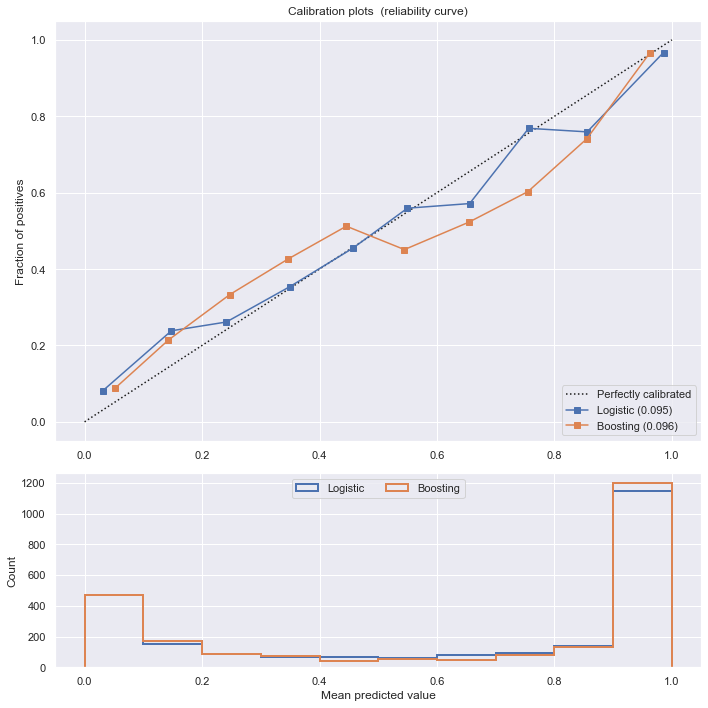

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Откалиброван с помощью изотонической калибровки
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Откалиброван сигмовидной калибровкой
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Логистическая регрессия без калибровки в качестве базовой линии
    lr = LogisticRegression(C=1., solver='liblinear')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name)]:
        if name == 'Logistic':
            clf.fit(x_train, y_train)
        else:
            clf.fit(x_train, y_train, x_valid, y_valid)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(x_test)[:, 1]
        else:  # использовать функцию принятия решения
            prob_pos = clf.decision_function(x_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

plot_calibration_curve(Boosting(base_model_params = {'max_depth' : 7, 'min_samples_split' : 3, 'min_samples_leaf' : 3}, 
              learning_rate = 0.16733770706790776, n_estimators = 234, subsample = 0.8871866568327716, 
              early_stopping_rounds = 8), 'Boosting', 1)

plt.show()

Неплохо оценивает, в целом очень похоже на кривую для логистической регрессии

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [286]:
x.shape[1]

169

In [289]:
Boosting(base_model_params = {'max_depth' : 7, 'min_samples_split' : 3, 'min_samples_leaf' : 3}, 
              learning_rate = 0.16733770706790776, n_estimators = 234, subsample = 0.8871866568327716, 
              early_stopping_rounds = 8)
boosting.fit(x_train, y_train, x_valid, y_valid)

сурс: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

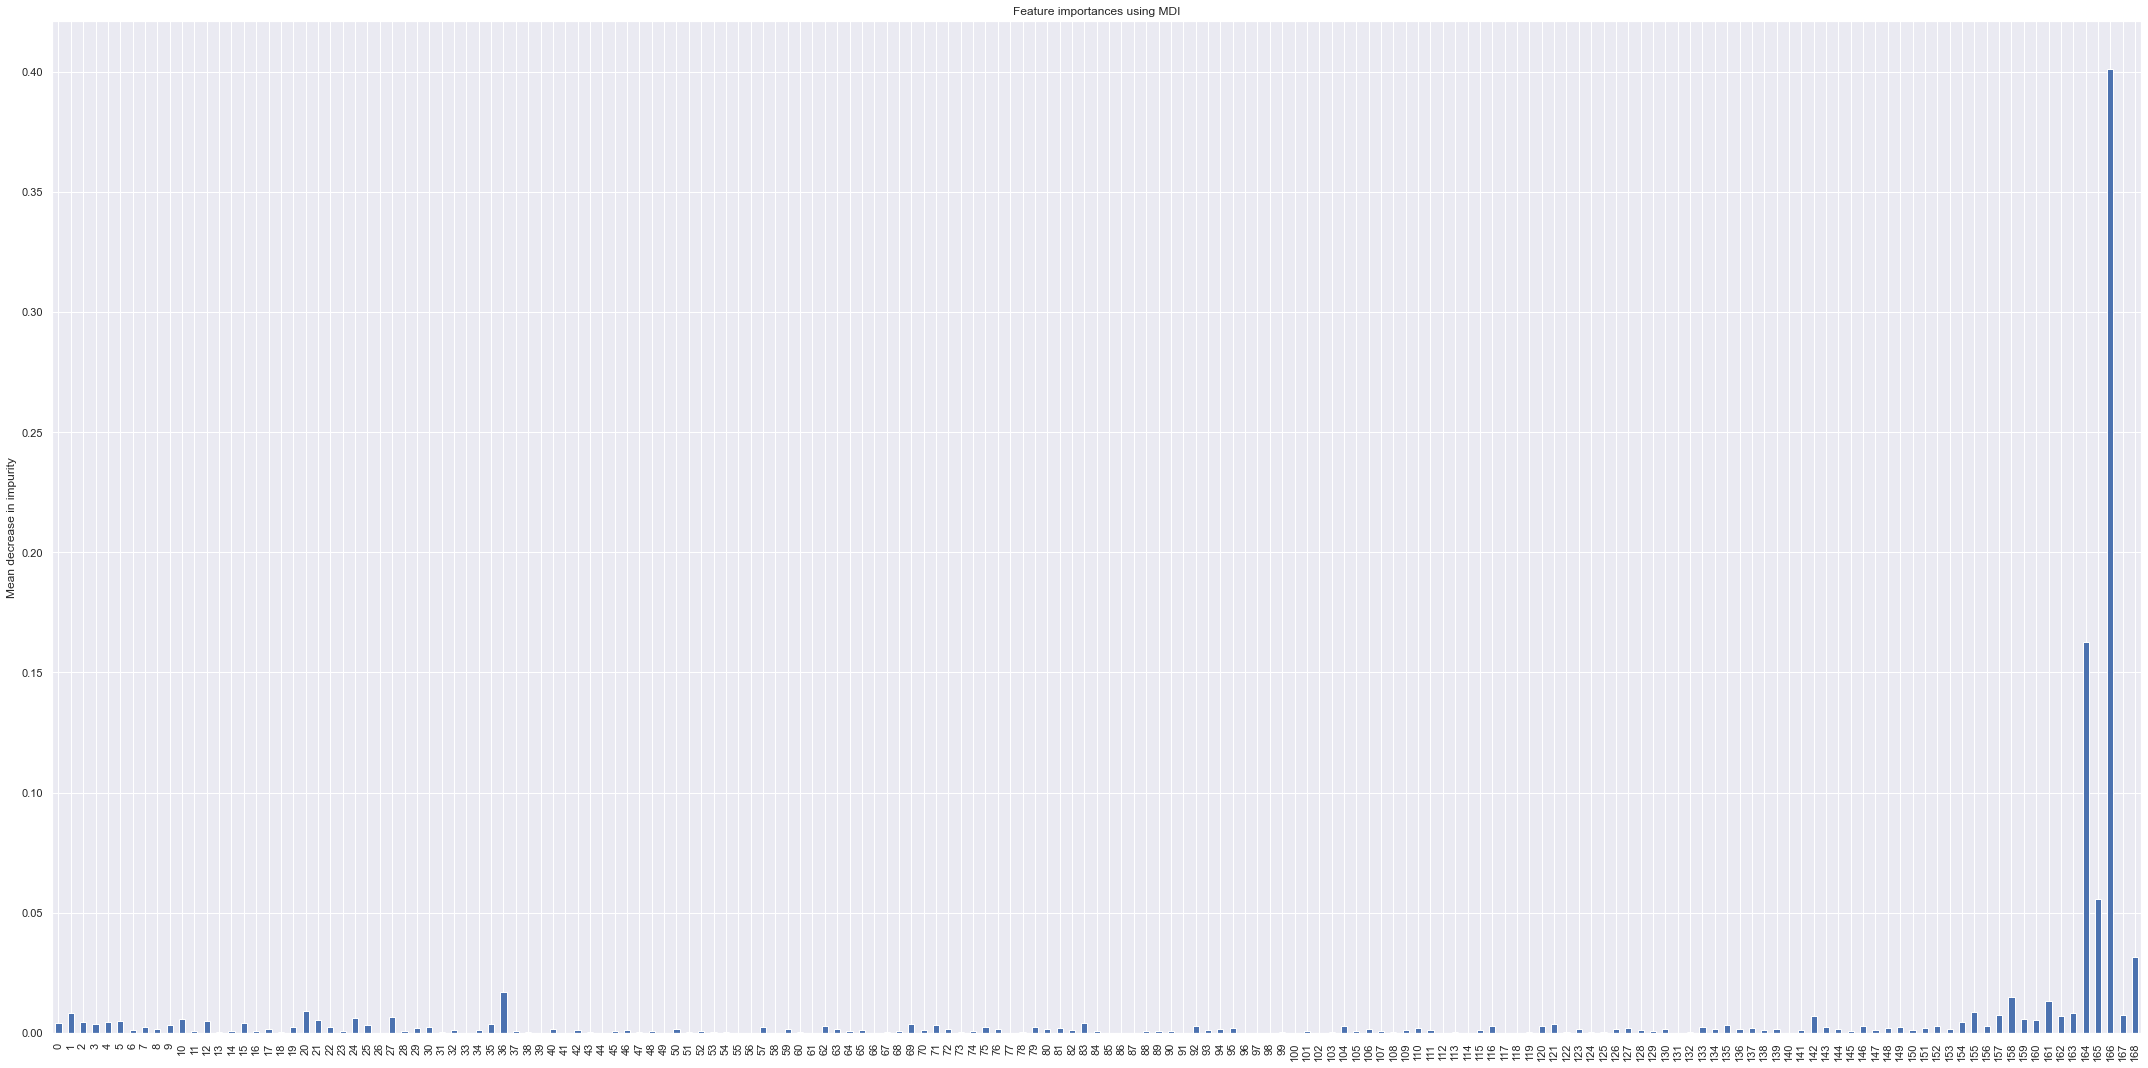

In [294]:
import pandas as pd
feature_names = [f"{i}" for i in range(x.shape[1])]
importances = boosting.feature_importances_
boosting_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (30,15))
boosting_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [310]:
importances[importances > 5e-4].shape

(125,)

In [311]:
threshold = 5e-4
x_train_filtered = x_train[:, importances > threshold]
x_valid_filtered = x_valid[:, importances > threshold]
x_test_filtered = x_test[:, importances > threshold]

In [312]:
boosting = Boosting(base_model_params = {'max_depth' : 7, 'min_samples_split' : 3, 'min_samples_leaf' : 3}, 
              learning_rate = 0.16733770706790776, n_estimators = 234, subsample = 0.8871866568327716, 
              early_stopping_rounds = 8)
boosting.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)
print('Train AUC_ROC: ', boosting.score(x_train_filtered, y_train))
print('Test AUC_ROC: ', boosting.score(x_test_filtered, y_test))

Train AUC_ROC:  0.9857222066979382
Test AUC_ROC:  0.9420616164113093


Покрутил порог, остановился на таком. Качество заметно выросло

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [317]:
params={'n_estimators': 442, 'max_depth': 3, 'min_child_weight': 1, 'learning_rate': 0.10711288058054164, 
        'gamma': 0.057912764901967215, 'subsample': 0.8004360184565416, 'colsample_bytree': 0.33504090621134813}

In [350]:
from sklearn.linear_model import LinearRegression

boosting = Boosting(base_model_params = {'max_depth' : 7, 'min_samples_split' : 3, 'min_samples_leaf' : 3}, 
              learning_rate = 0.16733770706790776, n_estimators = 234, subsample = 0.8871866568327716, 
              early_stopping_rounds = 8).fit(x_train, y_train, x_valid, y_valid)
y_boosting = np.argmax(boosting.predict_proba(x), axis = 1) * 2 - 1
xgboosting = xgb.XGBClassifier(**params).fit(x_train, y_train)
y_xgboosting = xgboosting.predict(x)

x_blend = np.array([y_boosting, y_xgboosting]).T
x_blend_train, x_blend_test, y_blend_train, y_blend_test = train_test_split(x_blend, y, test_size=0.2, random_state=51261)
clf = LogisticRegression(solver='liblinear').fit(x_blend_train, y_blend_train)

In [351]:
roc_auc_score(y_blend_test == 1, clf.predict_proba(x_blend_test)[:, 1])

0.9290121981114301

Стало хуже

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?

![kek](https://sun9-59.userapi.com/impg/wa4hYU3sFfpyHhhPCAQsHXcjNPMoIdzR4B5h8A/QGvY0s0Ii9g.jpg?size=958x1280&quality=96&sign=79d73473baa034d0d08c8bf16f081060&type=album)

от 2022 жду поступления в шад, так же хотелось бы побольше отдыхать и тратить времени на собственное здоровье!